Задача 2 Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Используя градиентный спуск, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет без intercept.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

Для определения возможности применения метода линейной регрессии смотрим на коэффициент корркляции Пирсона и график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

In [3]:
# находим коэффициент корркляции Пирсона
r = np.corrcoef(zp, ks)[1][0]
print('коэффициент корркляции Пирсона =', r)

коэффициент корркляции Пирсона = 0.8874900920739162


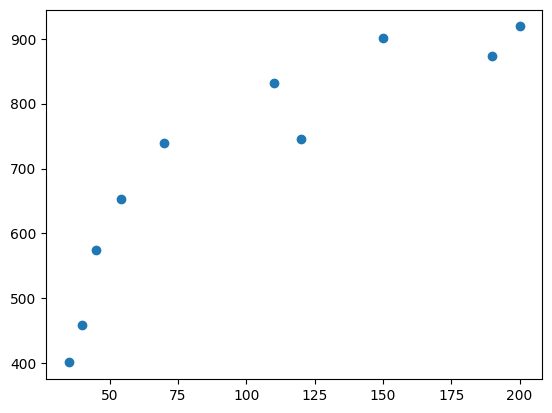

In [4]:
# строим график рапределения зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.
plt.scatter(zp, ks)

График и коэффициент корркляции Пирсона позволяют нам предположить о существовании линейной зависимости значения поведенческого кредитного скоринга заёмщиков банка от их заработной платы.

Вычисляем коэффициенты линейной зависимости методом градиентного спуска.

In [5]:
alpha = 1e-8
b1 = 1

In [6]:
 # Объявляем функцию потерь

def mse_(x, y, b1):
    return (sum((y - x * b1) ** 2)) / n

In [7]:
# Объявляем производную функции потерь

def mse_p(x, y, b1):
    return (sum((x * b1 - y) * x)) * (2 / n)

In [8]:
# вычисляем коэффициент b1
st = 0
while b1 - st > alpha:
    st = b1
    b1 -= alpha * mse_p(zp, ks, b1)
print(b1)

5.889784143048279


Проверяем вычсленную модель

In [9]:
# находим остатки регрессии
y = zp * b1
resid = ks - zp * b1
resid

array([ 194.85755499,  308.95971356, -245.05898718, -258.95682861,
        223.40863428,  326.71510999,  334.95165628,   18.53237854,
         39.22590283,  184.12374426])

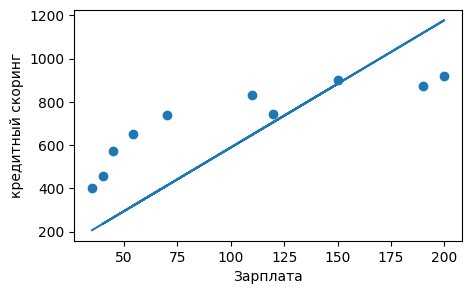

In [10]:
# строим график
plt.figure(figsize=(5, 3))
plt.plot(zp, y)
plt.scatter(zp, ks)
plt.xlabel('Зарплата')
plt.ylabel('кредитный скоринг')
plt.show()

In [11]:
# проверка на нормальность
stats.shapiro(resid)

ShapiroResult(statistic=0.860672116279602, pvalue=0.07771379500627518)

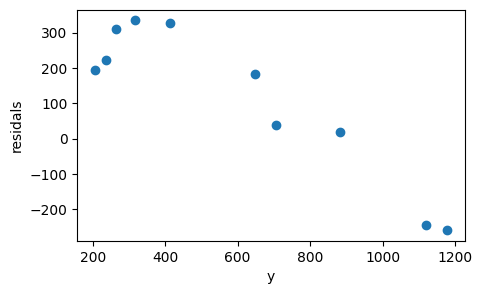

In [12]:
# проверка на Гомоскедастичность
plt.figure(figsize=(5, 3))
plt.scatter(y, resid)
plt.xlabel('y')
plt.ylabel('residals')
plt.show()

In [13]:
# вычисляем коэффициент детерминации
R2 = r ** 2
print('коэффициент детерминации =', R2)

коэффициент детерминации = 0.7876386635293682


In [14]:
# оцениваем значимость модели линейной регрессии используя критерий Фишера
F = (R2 / 1) / ((1 - R2) / (n - 1 - 1))
print('F =', F)

F = 29.671640859664432


Табличное значение критерия Фишера равно 5,32 расчётное значение равно 29.67. Делаем вывод что модель является статистически значимой.